In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [36]:
imdb = pd.read_csv("https://raw.githubusercontent.com/cardosorrenan/alura-QuarentenaDados/master/csv/imdb.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### **Day 3 - Task 1**: Plot the boxplot (column imdb_score) of the colored and bw films

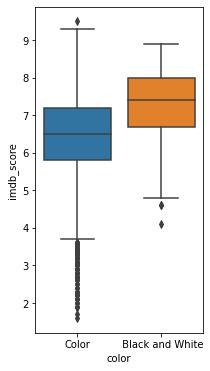

In [37]:
imdb_has_attr_color = imdb.dropna(subset=['color'])
sns.boxplot(data = imdb_has_attr_color, x ="color", y="imdb_score")
plt.gcf().set_size_inches(3, 6)

#### **Day 3 - Task 2**: In the graph (budget x gross), we have a point with a high gross value (close to 2.5) and also a high loss, find this movie

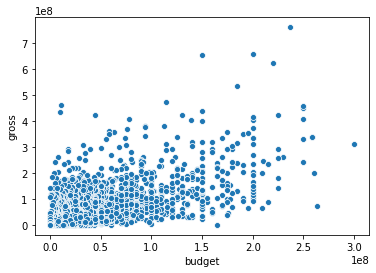

In [38]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
sns.scatterplot(x="budget", y="gross", data = imdb_usa) 

In [39]:
imdb_usa.query('budget > 250000000 & gross < 100000000')['movie_title']

5    John Carter 
Name: movie_title, dtype: object

#### **Day 3 - Task 4**: What are the films that came before the 2WW decade and have high gains

,movie_title,title_year,gross
3970,Gone with the Wind,1939.0,198655278.0
4449,Snow White and the Seven Dwarfs,1937.0,184925485.0


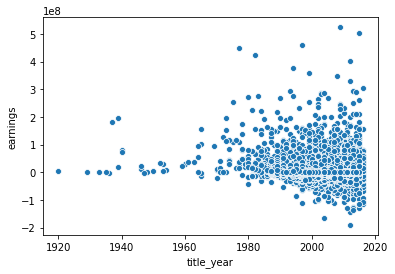

In [40]:
imdb_usa['earnings'] = imdb_usa['gross'] - imdb_usa['budget']
sns.scatterplot(x="title_year", y="earnings", data = imdb_usa)
imdb_usa.query('title_year > 1935 & title_year < 1940 & earnings > 150000000')[['movie_title', 'title_year', 'gross']]

#### **Day 3 - Task 5**: In the graph (movies_per_director x gross), we have some strange points between 15 and 20. Confirm Paulo's theory that the director is Woody Allen

director_name
A. Raven Cruz         1
Mabrouk El Mechri     1
Lynn Shelton          1
Luke Dye              1
Luis Valdez           1
                     ..
Spike Lee            16
Woody Allen          18
Martin Scorsese      20
Clint Eastwood       20
Steven Spielberg     24
Name: movies_director, Length: 1812, dtype: int64

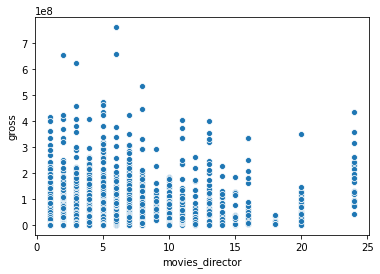

In [41]:
movies_director = imdb_usa.groupby('director_name')['director_name'].count().rename('movies_director')
gross_director_movies = imdb_usa[['director_name', 'gross', 'movie_title']].merge(movies_director, on='director_name')
sns.scatterplot(x="movies_director", y="gross", data = gross_director_movies)
gross_director_movies.query('movies_director == 18').sort_values('gross').head()
movies_director.sort_values()

#### **Day 3 - Task 7**: Calculate the correlation of films only after the 2000s

In [42]:
imdb_usa_af2000 = imdb_usa.query('title_year > 2000')
imdb_usa_af2000[["gross", "budget", "earnings", "title_year"]].corr()

,gross,budget,earnings,title_year
gross,1.000000,0.708622,0.770074,0.102319
budget,0.708622,1.000000,0.095558,0.059220
earnings,0.770074,0.095558,1.000000,0.028288
title_year,0.102319,0.059220,0.028288,1.000000


#### **Day 3 - Task 8**: Try to find a graph that looks like a line

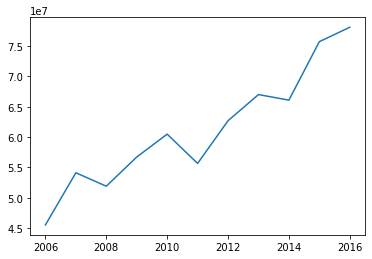

In [43]:
sns.lineplot(data = imdb_usa.query('title_year > 2005').groupby('title_year')['gross'].mean())

#### **Day 3 - Task 9**: Show the correlation between other variables present in the dataframe. Counting revisions per year can also be a resource.

In [44]:
imdb_usa[["num_user_for_reviews", "num_voted_users"]].corr()

,num_user_for_reviews,num_voted_users
num_user_for_reviews,1.000000,0.797354
num_voted_users,0.797354,1.000000


In [45]:
imdb_usa[["actor_1_facebook_likes", "cast_total_facebook_likes"]].corr()

,actor_1_facebook_likes,cast_total_facebook_likes
actor_1_facebook_likes,1.000000,0.953753
cast_total_facebook_likes,0.953753,1.000000


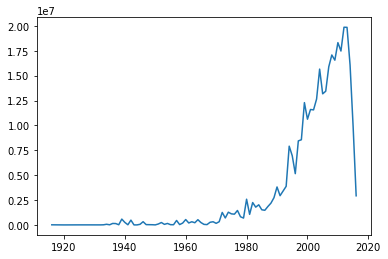

In [46]:
sns.lineplot(data = imdb_usa.groupby('title_year')['num_voted_users'].sum())